# Data Visualization Project: GDP and Life Expectancy
## Introduction

In this project, I will be looking at GDP and Life Expectancy data from 6 different countries over 15 years. I will be using various different plot types to communicate my findings. Questions I will be investigating include: 
1. Has GDP/Life Expectancy increased over time for each nation?
2. Is there a correlation between GDP and Life Expectancy?
3. Which country has had the greatest increase in GDP/Life Expectancy over the last 15 years?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

### Importing Python Modules & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt


In [2]:
data_original = pd.read_csv('all_data.csv')
data_original.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Renaming Columns and Starting Exploration

Each column will be renamed with lowercase letters, and spaces will be replaced with underscores to make working with the data easier

You can see the first five lines of the data with the renamed columns and the summary statisics of numerical columns listed below. The 'year' column shows up in the summary statistics table because each year is formatted as an integer, not a string. This can be changed, but I don't think it is necessary for this project. We can also see that there are 96 not null values in each column, meaning there are no missing values in our data set.

Taking a look at our summary statisitcs, we can see that the mean life expectancy over all 6 countries is 72.79, with a standard deviation of 10.67 years. This tells us that there is decent variation within life expectacy. The mean GDP is around \\$3.9 trillion, with a standard deviation of around \\$5.2 trillion.

Moving to the histograms, we can see that life expectancy is skewed left, meaning most of our values lie between 70 to 80 years old. Also, we see that GDP is skewed right, meaning most values fall below $7.5 trillon.

In [3]:
data_original.columns.str.lower()
data_original.columns.str.replace(' ','_')
data = data_original.rename(columns = {'Country' :'country', 'Year':'year', 'Life expectancy at birth (years)':'life_expectancy', 'Low Price':'low_price', 'Close Price':'close_price', 'WAP':'weighted_avg_price',
       'GDP':'gdp'}, inplace = False)
print(data.head())

  country  year  life_expectancy           gdp
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


In [4]:
print(data.describe())
print(data.notnull().sum())

              year  life_expectancy           gdp
count    96.000000        96.000000  9.600000e+01
mean   2007.500000        72.789583  3.880499e+12
std       4.633971        10.672882  5.197561e+12
min    2000.000000        44.300000  4.415703e+09
25%    2003.750000        74.475000  1.733018e+11
50%    2007.500000        76.750000  1.280220e+12
75%    2011.250000        78.900000  4.067510e+12
max    2015.000000        81.000000  1.810000e+13
country            96
year               96
life_expectancy    96
gdp                96
dtype: int64


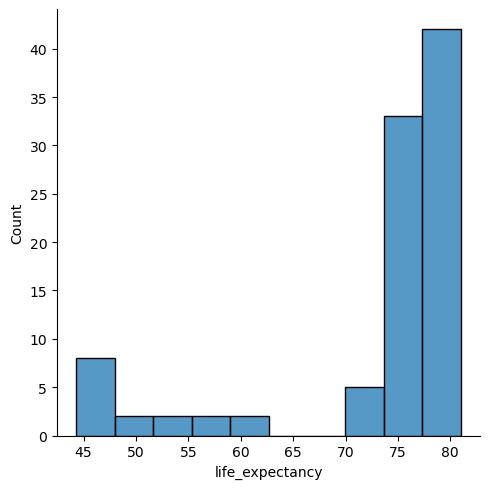

<Figure size 640x480 with 0 Axes>

In [5]:
## HISTOGRAM OF LIFE EXPECTANCY
sns.displot(data.life_expectancy, bins=10, kde=False)
plt.show()
plt.clf()

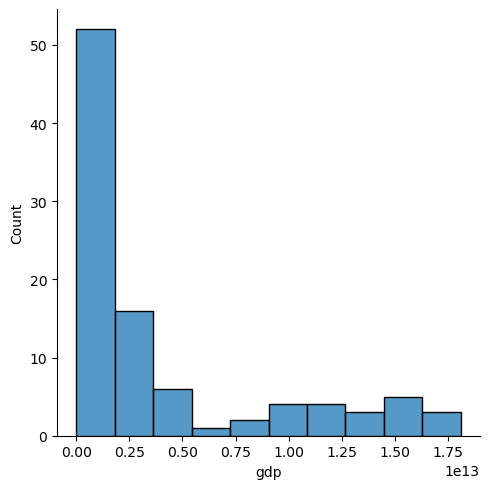

<Figure size 640x480 with 0 Axes>

In [6]:
## HISTOGRAM OF GDP
sns.displot(data.gdp, bins=10, kde=False)
plt.show()
plt.clf()

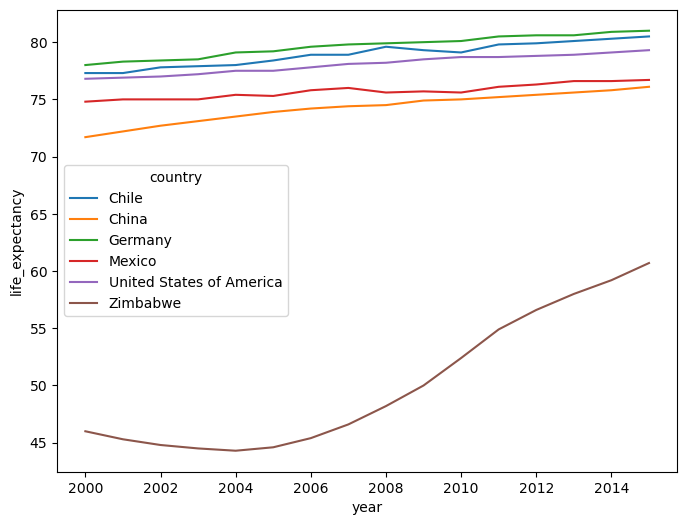

<Figure size 640x480 with 0 Axes>

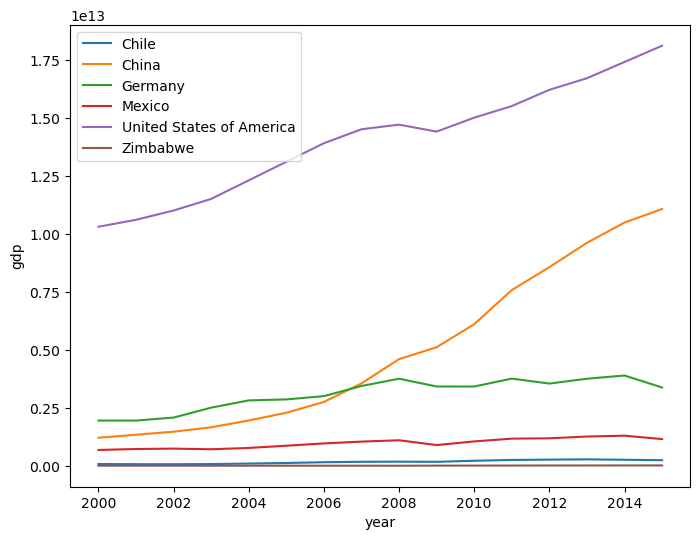

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(1, figsize=(8,6))
sns.lineplot(data=data, x='year', y='life_expectancy', hue='country')
plt.show()
plt.clf()
plt.figure(2, figsize=(8,6))
sns.lineplot(data=data, x='year', y='gdp', hue='country')
plt.legend()
plt.show()
plt.clf()